In [1]:
route_1=[[1, 2, 3, 2, 4, 5],
 [6, 15, 7, 10, 8, 15, 9, 15, 7, 10, 11],
 [12, 11, 13, 14, 10, 7, 15, 6, 3, 2, 1, 2]]

route_2 = [[3, 2, 4, 5, 4, 6, 15, 7, 10, 8, 15, 9],
 [10, 11, 12, 11, 13, 14, 10, 7, 15, 6, 3, 2, 1],
 [2, 3, 2, 4, 5, 4, 6, 15, 7, 10, 8]]

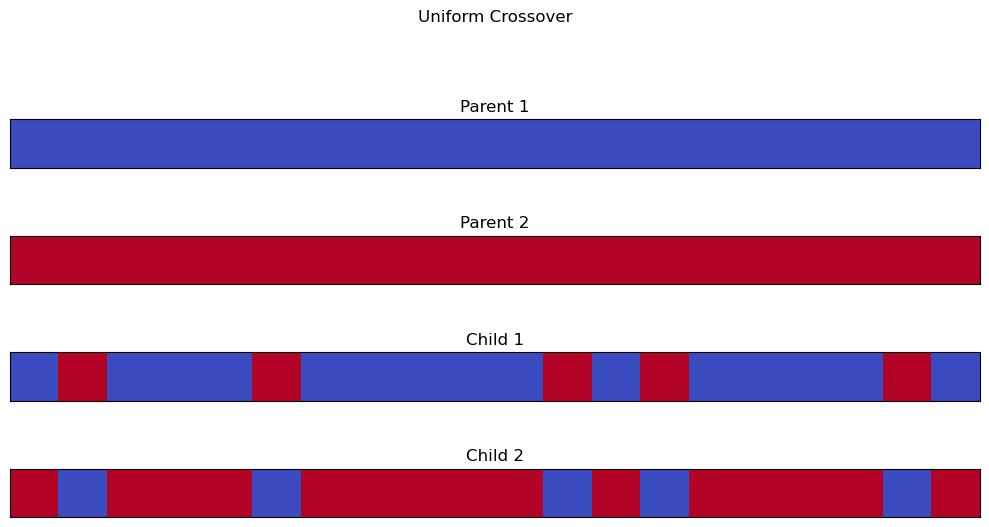

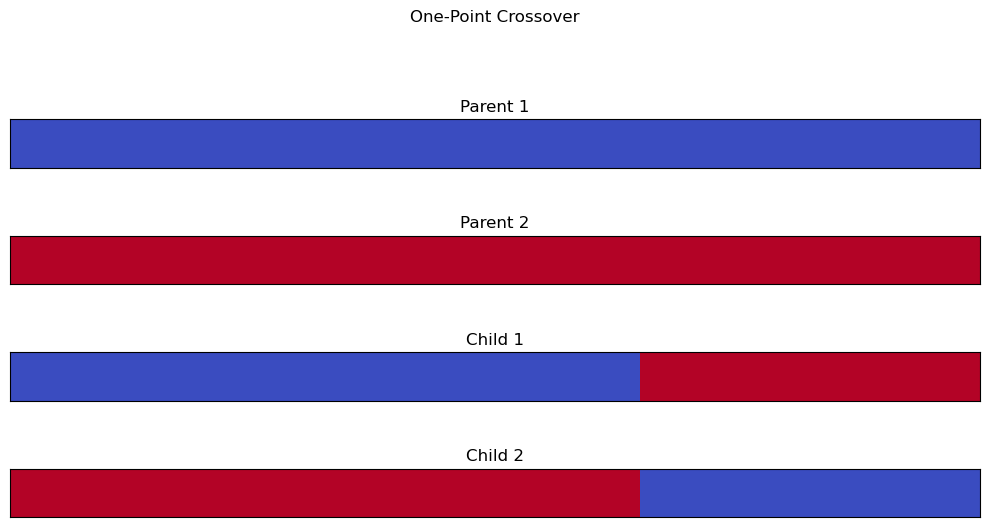

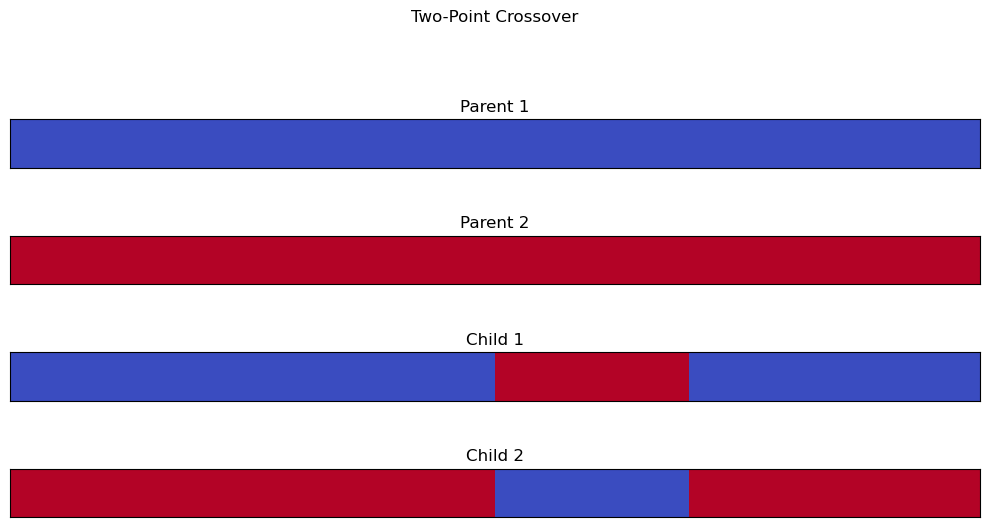

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Let's improve the visualization by plotting both children separately and improving the clarity of the plot.

def plot_crossover(parent1, parent2, child1, child2, title):
    """
    Helper function to plot the crossover process with an improved visualization.
    """
    fig, ax = plt.subplots(4, 1, figsize=(10, 6), gridspec_kw={'height_ratios': [1, 1, 1, 1]})
    
    # Define a simple function to remove ticks and labels
    def remove_ticks_and_labels(ax):
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Set up the colors
    cmap = "coolwarm"

    # Parent 1
    ax[0].matshow([parent1], cmap=cmap, vmin=0, vmax=1)
    ax[0].set_title("Parent 1")
    remove_ticks_and_labels(ax[0])
    
    # Parent 2
    ax[1].matshow([parent2], cmap=cmap, vmin=0, vmax=1)
    ax[1].set_title("Parent 2")
    remove_ticks_and_labels(ax[1])
    
    # Child 1
    ax[2].matshow([child1], cmap=cmap, vmin=0, vmax=1)
    ax[2].set_title("Child 1")
    remove_ticks_and_labels(ax[2])
    
    # Child 2
    ax[3].matshow([child2], cmap=cmap, vmin=0, vmax=1)
    ax[3].set_title("Child 2")
    remove_ticks_and_labels(ax[3])
    
    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


def uniform_crossover(parent1, parent2):
    """
    Perform a uniform crossover between two parent bitstrings.
    """
    child1, child2 = parent1.copy(), parent2.copy()
    for i in range(len(parent1)):
        if np.random.rand() < 0.5:
            child1[i], child2[i] = child2[i], child1[i]
    return child1, child2

def one_point_crossover(parent1, parent2):
    """
    Perform a one-point crossover between two parent bitstrings.
    """
    crossover_point = np.random.randint(1, len(parent1))
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def two_point_crossover(parent1, parent2):
    """
    Perform a two-point crossover between two parent bitstrings.
    """
    points = sorted(np.random.choice(range(1, len(parent1)), 2, replace=False))
    child1 = (parent1[:points[0]] + parent2[points[0]:points[1]] + parent1[points[1]:])
    child2 = (parent2[:points[0]] + parent1[points[0]:points[1]] + parent2[points[1]:])
    return child1, child2

# Example usage with bitstrings
parent1 = [0] * 20
parent2 = [1] * 20


# Generate crossover examples
# Uniform Crossover
u_child1, u_child2 = uniform_crossover(parent1, parent2)
plot_crossover(parent1, parent2, u_child1, u_child2, "Uniform Crossover")

# One-Point Crossover
op_child1, op_child2 = one_point_crossover(parent1, parent2)
plot_crossover(parent1, parent2, op_child1, op_child2, "One-Point Crossover")

# Two-Point Crossover
tp_child1, tp_child2 = two_point_crossover(parent1, parent2)
plot_crossover(parent1, parent2, tp_child1, tp_child2, "Two-Point Crossover")



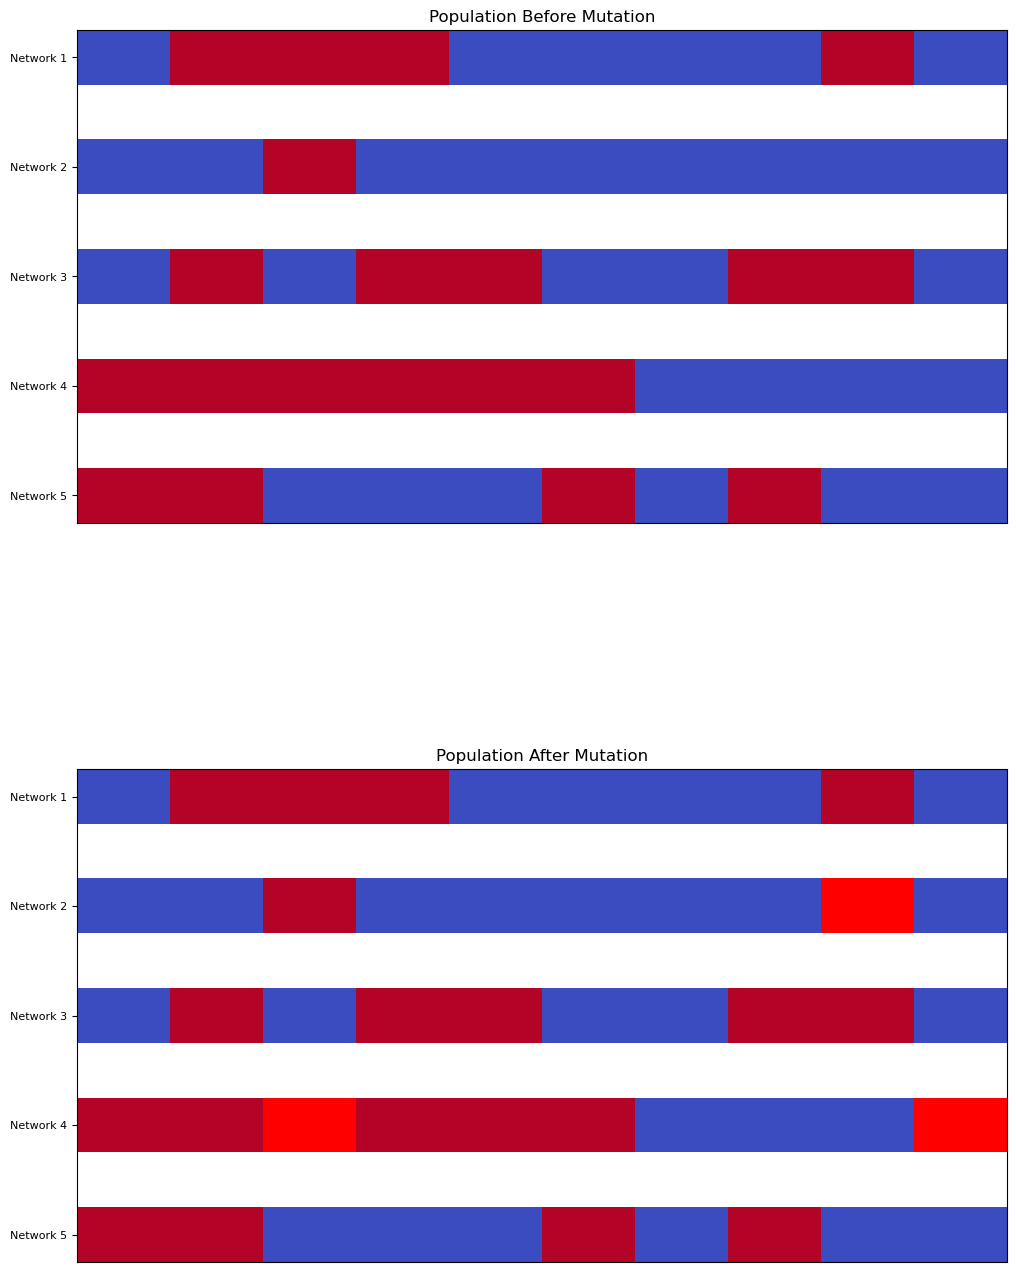

In [3]:
from matplotlib.colors import ListedColormap

def mutation_visual(population, mutation_indices, title_before, title_after):
    """
    Adjust the plotting function to include larger spaces between each row
    and maintain the "Network n" labels for clarity.
    """
    # Adjust population for mutation visualization
    mutated_population = population.copy()
    for individual_index, gene_index in mutation_indices:
        mutated_population[individual_index, gene_index] = 2  # Indicate mutation

    # Create an expanded population array with spaces between rows
    def expand_population_with_spaces(pop, space=1):
        expanded_pop = np.full((pop.shape[0] * (1 + space) - space, pop.shape[1]), -1)  # Use -1 for spaces
        for i in range(pop.shape[0]):
            expanded_pop[i * (1 + space):i * (1 + space) + 1] = pop[i]
        return expanded_pop

    # Apply expansion to both populations
    expanded_population = expand_population_with_spaces(population)
    expanded_mutated_population = expand_population_with_spaces(mutated_population)

    # Define custom color map for mutation visualization
    cmap = ListedColormap(['white', '#3a4cc0', '#b30326', 'red'])  # -1: white (space), 0: lightblue, 1: blue, 2: red

    # Create figure and axes
    fig, axs = plt.subplots(2, 1, figsize=(12, 16), gridspec_kw={'height_ratios': [1, 1], 'hspace': 0.5})

    # Plot expanded population before mutation
    axs[0].imshow(expanded_population, cmap=cmap, vmin=-1, vmax=2, aspect="auto")
    axs[0].set_title(title_before)
    axs[0].set_xticks([])
    axs[0].set_yticks([i * (1 + 1) for i in range(len(population))])
    axs[0].set_yticklabels([f"Network {i+1}" for i in range(len(population))])
    axs[0].tick_params(axis='y', which='major', labelsize=8)

    # Plot expanded population after mutation
    axs[1].imshow(expanded_mutated_population, cmap=cmap, vmin=-1, vmax=2, aspect="auto")
    axs[1].set_title(title_after)
    axs[1].set_xticks([])
    axs[1].set_yticks([i * (1 + 1) for i in range(len(mutated_population))])
    axs[1].set_yticklabels([f"Network {i+1}" for i in range(len(mutated_population))])
    axs[1].tick_params(axis='y', which='major', labelsize=8)

    plt.show()
population = np.random.randint(0, 2, (5, 10))
mutation_indices = [(np.random.randint(0, 5), np.random.randint(0, 10)) for _ in range(3)]  # 20 mutations in total
# Apply the adjustments to include larger spaces and labels
mutation_visual(population.copy(), mutation_indices, "Population Before Mutation", "Population After Mutation")


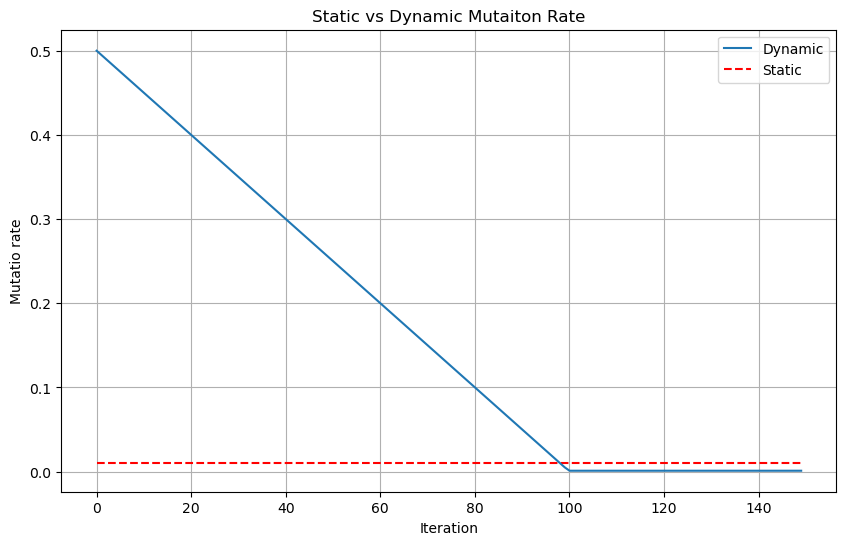

In [14]:
import matplotlib.pyplot as plt

# Initial values
initial_value = 0.5  # 50%
decrease_step = 0.005  # 0.5%
final_value = 0.001  # 0.1%
constant_value = 0.01  # 1%

# Calculating the decreasing line values
values = [initial_value]
i=1
while i < 150:
    next_value = values[-1] - decrease_step
    if next_value < final_value:  # Ensuring it doesn't go below final_value
        next_value = final_value
    values.append(next_value)
    i+=1
# Generating X axis values (steps)
steps = list(range(len(values)))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(steps, values, label='Dynamic')
plt.hlines(constant_value, 0, len(steps)-1, colors='r', label='Static', linestyles='dashed')
plt.xlabel('Iteration')
plt.ylabel('Mutatio rate')
plt.title('Static vs Dynamic Mutaiton Rate')
plt.legend()
plt.grid(True)
plt.show()


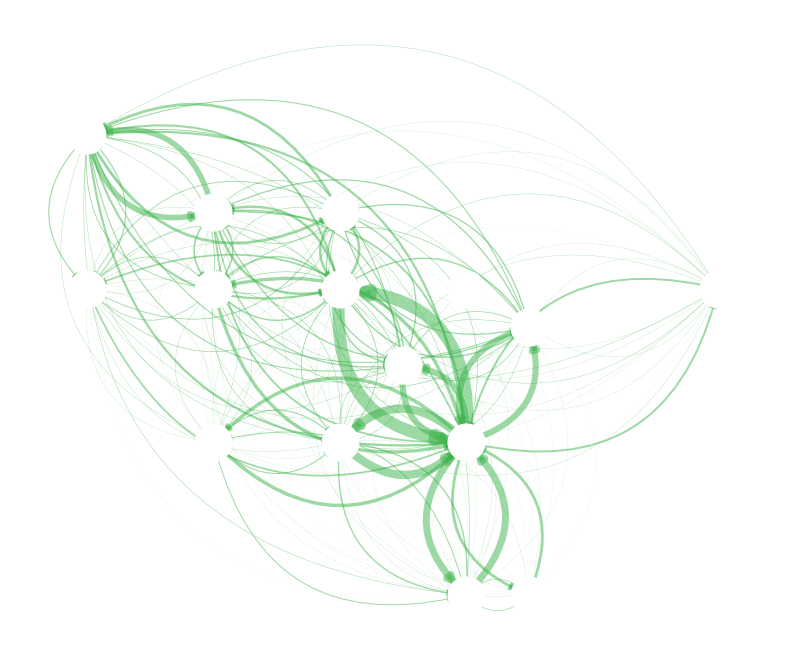

<Figure size 640x480 with 0 Axes>

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

positions = {
    1: (1, 4),
    2: (2, 3),
    3: (3, 3),
    4: (2, 2),
    5: (1, 2),
    6: (3, 2),
    7: (4.5, 1.5),
    8: (3.5, 1),
    9: (6, 2),
    10: (4, 0),
    11: (3, 0),
    12: (2, 0),
    13: (4, -2),
    14: (4.5, -2),
    15: (4, 2)
}
demand = {
    (1, 2): 400, (1, 3): 200, (1, 4): 60, (1, 5): 80, (1, 6): 150, 
    (1, 7): 75, (1, 8): 75, (1, 9): 30, (1, 10): 160, (1, 11): 30, 
    (1, 12): 25, (1, 13): 35, (2, 1): 400, (2, 3): 50, (2, 4): 120, 
    (2, 5): 20, (2, 6): 180, (2, 7): 90, (2, 8): 90, (2, 9): 15, 
    (2, 10): 130, (2, 11): 20, (2, 12): 10, (2, 13): 10, (2, 14): 5, 
    (3, 1): 200, (3, 2): 50, (3, 4): 40, (3, 5): 60, (3, 6): 180, 
    (3, 7): 90, (3, 8): 90, (3, 9): 15, (3, 10): 45, (3, 11): 20, 
    (3, 12): 10, (3, 13): 10, (3, 14): 5, (4, 1): 60, (4, 2): 120, 
    (4, 3): 40, (4, 5): 50, (4, 6): 100, (4, 7): 50, (4, 8): 50, 
    (4, 9): 15, (4, 10): 240, (4, 11): 40, (4, 12): 25, (4, 13): 10, 
    (4, 14): 5, (5, 1): 80, (5, 2): 20, (5, 3): 60, (5, 4): 50, 
    (5, 6): 50, (5, 7): 25, (5, 8): 25, (5, 9): 10, (5, 10): 120, 
    (5, 11): 20, (5, 12): 15, (5, 13): 5, (6, 1): 150, (6, 2): 180, 
    (6, 3): 180, (6, 4): 100, (6, 5): 50, (6, 7): 100, (6, 8): 100, 
    (6, 9): 30, (6, 10): 880, (6, 11): 60, (6, 12): 15, (6, 13): 15, 
    (6, 14): 10, (7, 1): 75, (7, 2): 90, (7, 3): 90, (7, 4): 50, 
    (7, 5): 25, (7, 6): 100, (7, 8): 50, (7, 9): 15, (7, 10): 440, 
    (7, 11): 35, (7, 12): 10, (7, 13): 10, (7, 14): 5, (8, 1): 75, 
    (8, 2): 90, (8, 3): 90, (8, 4): 50, (8, 5): 25, (8, 6): 100, 
    (8, 7): 50, (8, 9): 15, (8, 10): 440, (8, 11): 35, (8, 12): 10, 
    (8, 13): 10, (8, 14): 5, (9, 1): 30, (9, 2): 15, (9, 3): 15, 
    (9, 4): 15, (9, 5): 10, (9, 6): 30, (9, 7): 15, (9, 8): 15, 
    (9, 10): 140, (9, 11): 20, (9, 12): 5, (10, 1): 160, (10, 2): 130, 
    (10, 3): 45, (10, 4): 240, (10, 5): 120, (10, 6): 880, (10, 7): 440, 
    (10, 8): 440, (10, 9): 140, (10, 11): 600, (10, 12): 250, 
    (10, 13): 500, (10, 14): 200, (11, 1): 30, (11, 2): 20, (11, 3): 20, 
    (11, 4): 40, (11, 5): 20, (11, 6): 60, (11, 7): 35, (11, 8): 35, 
    (11, 9): 20, (11, 10): 600, (11, 12): 75, (11, 13): 95, (11, 14): 15, 
    (12, 1): 25, (12, 2): 10, (12, 3): 10, (12, 4): 25, (12, 5): 15, 
    (12, 6): 15, (12, 7): 10, (12, 8): 10, (12, 9): 5, (12, 10): 250, 
    (12, 11): 75, (12, 13): 70, (13, 1): 35, (13, 2): 10, (13, 3): 10, 
    (13, 4): 10, (13, 5): 5, (13, 6): 15, (13, 7): 10, (13, 8): 10, 
    (13, 10): 500, (13, 11): 95, (13, 12): 70, (13, 14): 45, 
    (14, 2): 5, (14, 3): 5, (14, 4): 5, (14, 6): 10, (14, 7): 5, 
    (14, 8): 5, (14, 10): 200, (14, 11): 15, (14, 13): 45
}
total_demand = sum(demand.values())

# Create a graph
G = nx.DiGraph()

# Add nodes
for node in positions:
    G.add_node(node, pos=positions[node])


# Draw the graph
fig, ax = plt.subplots(figsize=(10, 8))
background_color = "white"
nx.draw(G, positions, with_labels=True, node_color='white', node_size=700, font_size=10, font_color="white")

# Draw edges with varying widths based on demand
for (u, v), d in demand.items():
    nx.draw_networkx_edges(G, positions, edgelist=[(u, v)],connectionstyle='arc3,rad=0.5', width=d/100, alpha=0.5, edge_color='#3cb44b')

plt.title("Network Demand Visualization", color="white")
fig.set_facecolor(background_color)

plt.show()

In [16]:
total_demand = sum(demand.values())
print(total_demand)

15570


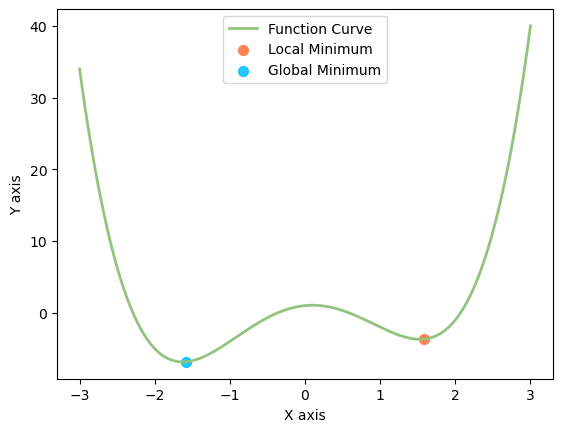

In [20]:
# Redefining the function as requested and updating the plot

x = np.linspace(-3, 3, 400)
z = x**4 - 5*x**2 + x + 1

fig, ax = plt.subplots()

# Plot with increased line width
ax.plot(x, z, label='Function Curve', linewidth=2, color="#93c47d")

# Global minimum
global_min_x = np.sqrt(5/2)  # Calculated from the derivative of the function for accuracy
global_min_z = global_min_x**4 - 5*global_min_x**2 + global_min_x + 1
ax.scatter(global_min_x, global_min_z, color='coral', s=50, label='Local Minimum', alpha=0.95)

# Local minimum
local_min_x = -np.sqrt(5/2)  # Symmetry in the function provides another local minimum
local_min_z = local_min_x**4 - 5*local_min_x**2 + local_min_x + 1
ax.scatter(local_min_x, local_min_z, color='deepskyblue', s=50, label='Global Minimum', alpha=0.85)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.legend()

plt.show()
